In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
pd.options.display.max_rows = 999

In [2]:
titanic_train = pd.read_csv("titanic/train.csv")

In [3]:
def create_age_range(age):
    if age == "NaN":
        return "unknown"
    if age <= 18:
        return "child"
    if age > 18:
        return "adult"

In [4]:
def create_fare_range(fare):
    if fare < 10:
        return "< 10"
    if fare >= 10 and fare < 20:
        return "10 to 20"
    if fare >= 20 and fare < 30:
        return "20 to 30"
    if fare >= 30 and fare < 40:
        return "30 to 40"
    if fare >= 40:
        return ">= 40"

In [5]:
def parents(par):
    if par == 1:
        return 1
    if par > 1:
        return 2
    else:
        return 0
    
def siblings(sib):
    if sib > 0:
        return "yes"
    else:
        return "no"

In [6]:
titanic_train["Age_range"] = titanic_train["Age"].map(create_age_range)
titanic_train["Fare_range"] = titanic_train["Fare"].map(create_fare_range)
titanic_train["Parental"] = titanic_train["Parch"].map(parents)
titanic_train["Siblings"] = titanic_train["SibSp"].map(siblings)

In [7]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_range,Fare_range,Parental,Siblings
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,adult,< 10,0,yes
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,adult,>= 40,0,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,adult,< 10,0,no
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,adult,>= 40,0,yes
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,adult,< 10,0,no


In [8]:
survivor_table = pd.pivot_table(titanic_train, index=["Sex", "Age_range", "Pclass", "Parental", "Siblings"], values=["Survived"])

In [9]:
survivor_table

Survived
Sex    Age_range Pclass Parental Siblings          
female adult     1      0        no        0.967742
                                 yes       1.000000
                        1        no        1.000000
                                 yes       1.000000
                        2        no        1.000000
                                 yes       0.800000
                 2      0        no        0.892857
                                 yes       0.833333
                        1        no        1.000000
                                 yes       0.875000
                        2        no        1.000000
                                 yes       1.000000
                 3      0        no        0.500000
                                 yes       0.363636
                        1        no        0.500000
                                 yes       0.333333
                        2        no        0.500000
                                 yes       0.166667
       child     1      0        no        1.000000
                                 yes       1.000000
                        1        no        1.000000
                        2        no        1.000000
                                 yes       0.666667
                 2      0        no        1.000000
                                 yes       1.000000
                        1        no        1.000000
                                 yes       1.000000
                        2        no        1.000000
                                 yes       1.000000
                 3      0        no        0.666667
                                 yes       0.400000
                        1        no        0.600000
                                 yes       0.625000
                        2        no        0.666667
                                 yes       0.200000
male   adult     1      0        no        0.370370
                                 yes       0.478261
                        1        no        0.222222
                                 yes       0.400000
                        2        no        0.000000
                                 yes       0.333333
                 2      0        no        0.087719
                                 yes       0.058824
                        1        no        0.000000
                                 yes       0.000000
                        2        no        0.000000
                                 yes       0.000000
                 3      0        no        0.139535
                                 yes       0.105263
                        1        no        0.000000
                                 yes       0.200000
                        2        no        0.000000
                                 yes       0.000000
       child     1      0        yes       0.000000
                        2        no        1.000000
                                 yes       1.000000
                 2      0        no        0.000000
                        1        yes       1.000000
                        2        no        1.000000
                 3      0        no        0.133333
                                 yes       0.250000
                        1        no        1.000000
                                 yes       0.166667
                        2        no        1.000000
                                 yes       0.181818

In [10]:
test = pd.read_csv("titanic/test.csv")
test["Age_range"] = test["Age"].map(create_age_range)
test["Parental"] = test["Parch"].map(parents)
test["Siblings"] = test["SibSp"].map(siblings)
test["Survived"] = 0

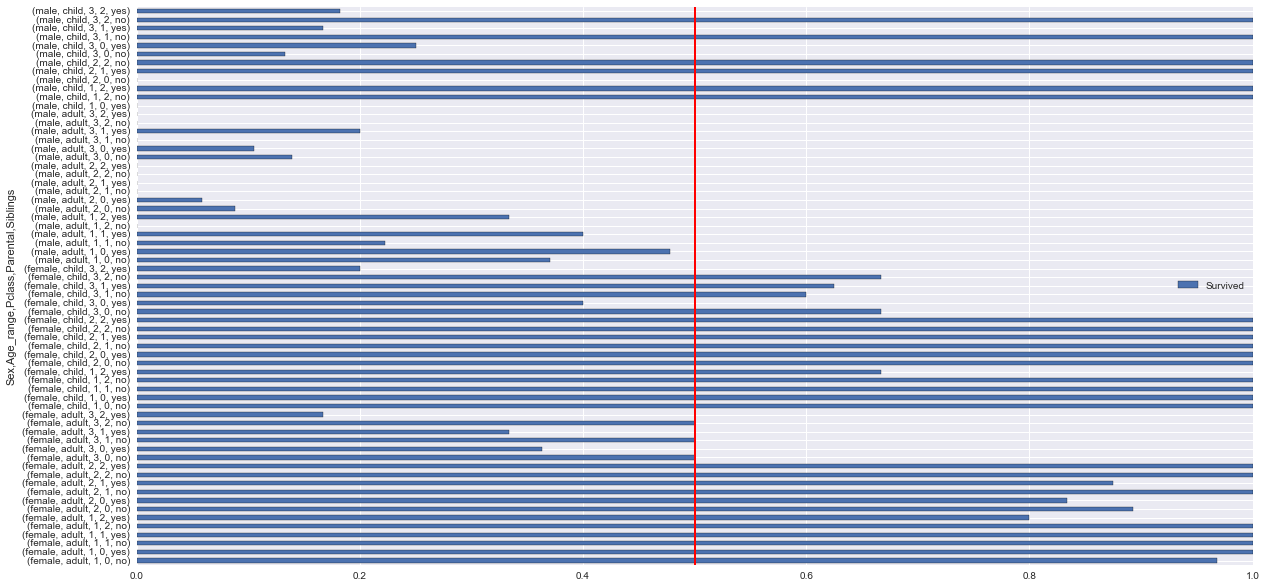

In [11]:
survivor_table.plot(kind="barh", figsize = (20,10))
plt.axvline(x=0.5, linewidth=2, color='r')
plt.show()

In [12]:
test.loc[(test["Sex"] == "female") & (test["Age_range"] == "adult") & (test["Pclass"] == 1), "Survived"] = 1

test.loc[(test["Sex"] == "female") & (test["Age_range"] == "adult") & (test["Pclass"] == 2), "Survived"] = 1

test.loc[(test["Sex"] == "female") & (test["Age_range"] == "child") & (test["Pclass"] == 1), "Survived"] = 1

test.loc[(test["Sex"] == "female") & (test["Age_range"] == "child") & (test["Pclass"] == 2), "Survived"] = 1

test.loc[(test["Sex"] == "female") & (test["Age_range"] == "adult") & (test["Pclass"] == 3) & 
         (test["Parental"] == 0) & (test["Siblings"] == "no"), "Survived"] = 1

test.loc[(test["Sex"] == "female") & (test["Age_range"] == "child") & (test["Pclass"] == 3) & 
         (test["Parental"] == 0) & (test["Siblings"] == "no"), "Survived"] = 1

test.loc[(test["Sex"] == "female") & (test["Age_range"] == "child") & (test["Pclass"] == 3) & 
         (test["Parental"] == 1), "Survived"] = 1

test.loc[(test["Sex"] == "female") & (test["Age_range"] == "child") & (test["Pclass"] == 3) & 
         (test["Parental"] == 2) & (test["Siblings"] == "no"), "Survived"] = 1

test.loc[(test["Sex"] == "male") & (test["Age_range"] == "child") & (test["Pclass"] == 1) & 
         (test["Parental"] == 2), "Survived"] = 1

test.loc[(test["Sex"] == "male") & (test["Age_range"] == "child") & (test["Pclass"] == 2) & 
         (test["Parental"] == 1), "Survived"] = 1

test.loc[(test["Sex"] == "male") & (test["Age_range"] == "child") & (test["Pclass"] == 2) & 
         (test["Parental"] == 2), "Survived"] = 1

test.loc[(test["Sex"] == "male") & (test["Age_range"] == "child") & (test["Pclass"] == 3) & 
         (test["Parental"] == 1) & (test["Siblings"] == "no"), "Survived"] = 1

test.loc[(test["Sex"] == "male") & (test["Age_range"] == "child") & (test["Pclass"] == 3) & 
         (test["Parental"] == 2) & (test["Siblings"] == "no"), "Survived"] = 1

In [13]:
test = test[["PassengerId", "Survived"]]
test.to_csv("titanic/test_results.csv", index=False)